In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.anova import anova_lm

In [2]:
crypto = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Final Project/first.csv")

In [3]:
crypto.head()

,Bitcoin Change %,Ethereum Change %,Tether Change %,BNB Change %,USD Coin Change %,XRP Change %,Binance USD Change %,Cardano Change %,Polygon Change %,Dogecoin Change %
0,0.0133,0.0134,0.0001,0.0183,-0.0001,0.0136,-0.0001,0.0180,0.0332,0.0119
1,-0.0324,-0.0208,0.0000,-0.0412,0.0000,-0.0423,0.0001,-0.0748,0.0330,-0.0484
2,0.0959,0.0771,-0.0002,0.0719,0.0003,0.0499,0.0002,0.0827,0.0558,0.0686
3,0.0196,0.0329,-0.0002,0.0064,0.0003,0.0314,0.0006,0.0769,0.0618,0.0185
4,-0.0007,-0.0063,0.0004,-0.0585,-0.0006,-0.0117,-0.0008,-0.0140,-0.0432,-0.0019


In [4]:
crypto.columns = ['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USDCoin', 'XRP', 'BinanceUSD', 'Cardano', 'Polygon', 'Dogecoin']

In [5]:
crypto.head()

,Bitcoin,Ethereum,Tether,BNB,USDCoin,XRP,BinanceUSD,Cardano,Polygon,Dogecoin
0,0.0133,0.0134,0.0001,0.0183,-0.0001,0.0136,-0.0001,0.0180,0.0332,0.0119
1,-0.0324,-0.0208,0.0000,-0.0412,0.0000,-0.0423,0.0001,-0.0748,0.0330,-0.0484
2,0.0959,0.0771,-0.0002,0.0719,0.0003,0.0499,0.0002,0.0827,0.0558,0.0686
3,0.0196,0.0329,-0.0002,0.0064,0.0003,0.0314,0.0006,0.0769,0.0618,0.0185
4,-0.0007,-0.0063,0.0004,-0.0585,-0.0006,-0.0117,-0.0008,-0.0140,-0.0432,-0.0019


We have to eliminate USDcoin, Binance USD, Polygon because they didn't exist in 2018-02-17.

5년 전부터 존재했던 코인들 데이터를 같이 붙이면 좋을 듯.

In [6]:
crypto_lm = smf.ols(formula='Bitcoin~Ethereum+Tether+BNB+XRP+Cardano+Dogecoin', data=crypto).fit()

In [7]:
crypto_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     726.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:37:48   Log-Likelihood:                 4515.1
No. Observations:                1827   AIC:                            -9016.
Df Residuals:                    1820   BIC:                            -8978.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.531e-05      0.000     -0.032      0.975      -0.001       0.001
Ethereum       0.4572      0.017     26.331      0.000       0.423       0.491
Tether        -0.1430      0.215     -0.666      0.506      -0.564       0.278
BNB            0.1003      0.012      8.068      0.000       0.076       0.125
XRP            0.0370      0.012      3.192      0.001       0.014       0.060
Cardano        0.0746      0.013      5.546      0.000       0.048       0.101
Dogecoin   -2.681e-05      0.000     -0.081      0.935      -0.001       0.001
==============================================================================
Omnibus:                      239.520   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.457
Skew:                           0.466   Prob(JB):                    4.70e-300
Kurtosis:                       7.152   Cond. No.                         652.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
np.log(crypto).head()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Bitcoin,Ethereum,Tether,BNB,USDCoin,XRP,BinanceUSD,Cardano,Polygon,Dogecoin
0,-4.319991,-4.312501,-9.210340,-4.000854,NaN,-4.297685,NaN,-4.017384,-3.405205,-4.431217
1,NaN,NaN,-inf,NaN,-inf,NaN,-9.210340,NaN,-3.411248,NaN
2,-2.344449,-2.562652,NaN,-2.632479,-8.111728,-2.997734,-8.517193,-2.492536,-2.885981,-2.679463
3,-3.932226,-3.414283,NaN,-5.051457,-8.111728,-3.460947,-7.418581,-2.565249,-2.783852,-3.989985
4,NaN,NaN,-7.824046,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
anova_lm(crypto_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Ethereum,1.0,1.763644,1.763644,4205.113883,0.000000e+00
Tether,1.0,0.000298,0.000298,0.709576,3.996954e-01
BNB,1.0,0.040824,0.040824,97.337636,2.108362e-22
XRP,1.0,0.009291,0.009291,22.153705,2.706809e-06
Cardano,1.0,0.012896,0.012896,30.748016,3.368389e-08
Dogecoin,1.0,0.000003,0.000003,0.006595,9.352865e-01
Residual,1820.0,0.763316,0.000419,NaN,NaN


In [10]:
crypto_improve_lm = smf.ols(formula='Bitcoin~Ethereum+BNB+XRP+Cardano+Dogecoin', data=crypto).fit()

In [11]:
crypto_improve_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     871.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:37:48   Log-Likelihood:                 4514.9
No. Observations:                1827   AIC:                            -9018.
Df Residuals:                    1821   BIC:                            -8985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.536e-05      0.000     -0.032      0.974      -0.001       0.001
Ethereum       0.4570      0.017     26.328      0.000       0.423       0.491
BNB            0.1004      0.012      8.087      0.000       0.076       0.125
XRP            0.0372      0.012      3.211      0.001       0.014       0.060
Cardano        0.0744      0.013      5.531      0.000       0.048       0.101
Dogecoin   -3.081e-05      0.000     -0.093      0.926      -0.001       0.001
==============================================================================
Omnibus:                      240.366   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.400
Skew:                           0.467   Prob(JB):                    5.37e-302
Kurtosis:                       7.166   Cond. No.                         59.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
crypto_improve2_lm = smf.ols(formula='Bitcoin~Ethereum+BNB+XRP+Cardano', data=crypto).fit()

In [13]:
crypto_improve2_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1090.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:37:48   Log-Likelihood:                 4514.9
No. Observations:                1827   AIC:                            -9020.
Df Residuals:                    1822   BIC:                            -8992.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.643e-05      0.000     -0.034      0.973      -0.001       0.001
Ethereum       0.4570      0.017     26.338      0.000       0.423       0.491
BNB            0.1004      0.012      8.090      0.000       0.076       0.125
XRP            0.0372      0.012      3.213      0.001       0.014       0.060
Cardano        0.0744      0.013      5.532      0.000       0.048       0.101
==============================================================================
Omnibus:                      240.364   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.185
Skew:                           0.467   Prob(JB):                    5.98e-302
Kurtosis:                       7.165   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
anova_lm(crypto_improve2_lm, crypto_lm)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1822.0,0.763506,0.0,NaN,NaN,NaN
1,1820.0,0.763316,2.0,0.00019,0.226055,0.797696


It means that, we can reject the null(removed model), so that we had better use the full model.

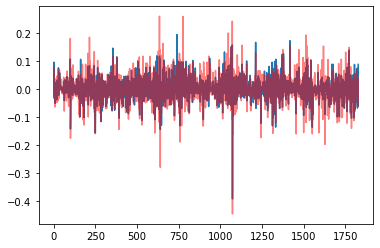

In [15]:
plt.plot(crypto['Bitcoin'])
plt.plot(crypto['Ethereum'], color='red', alpha=0.5)
plt.show()

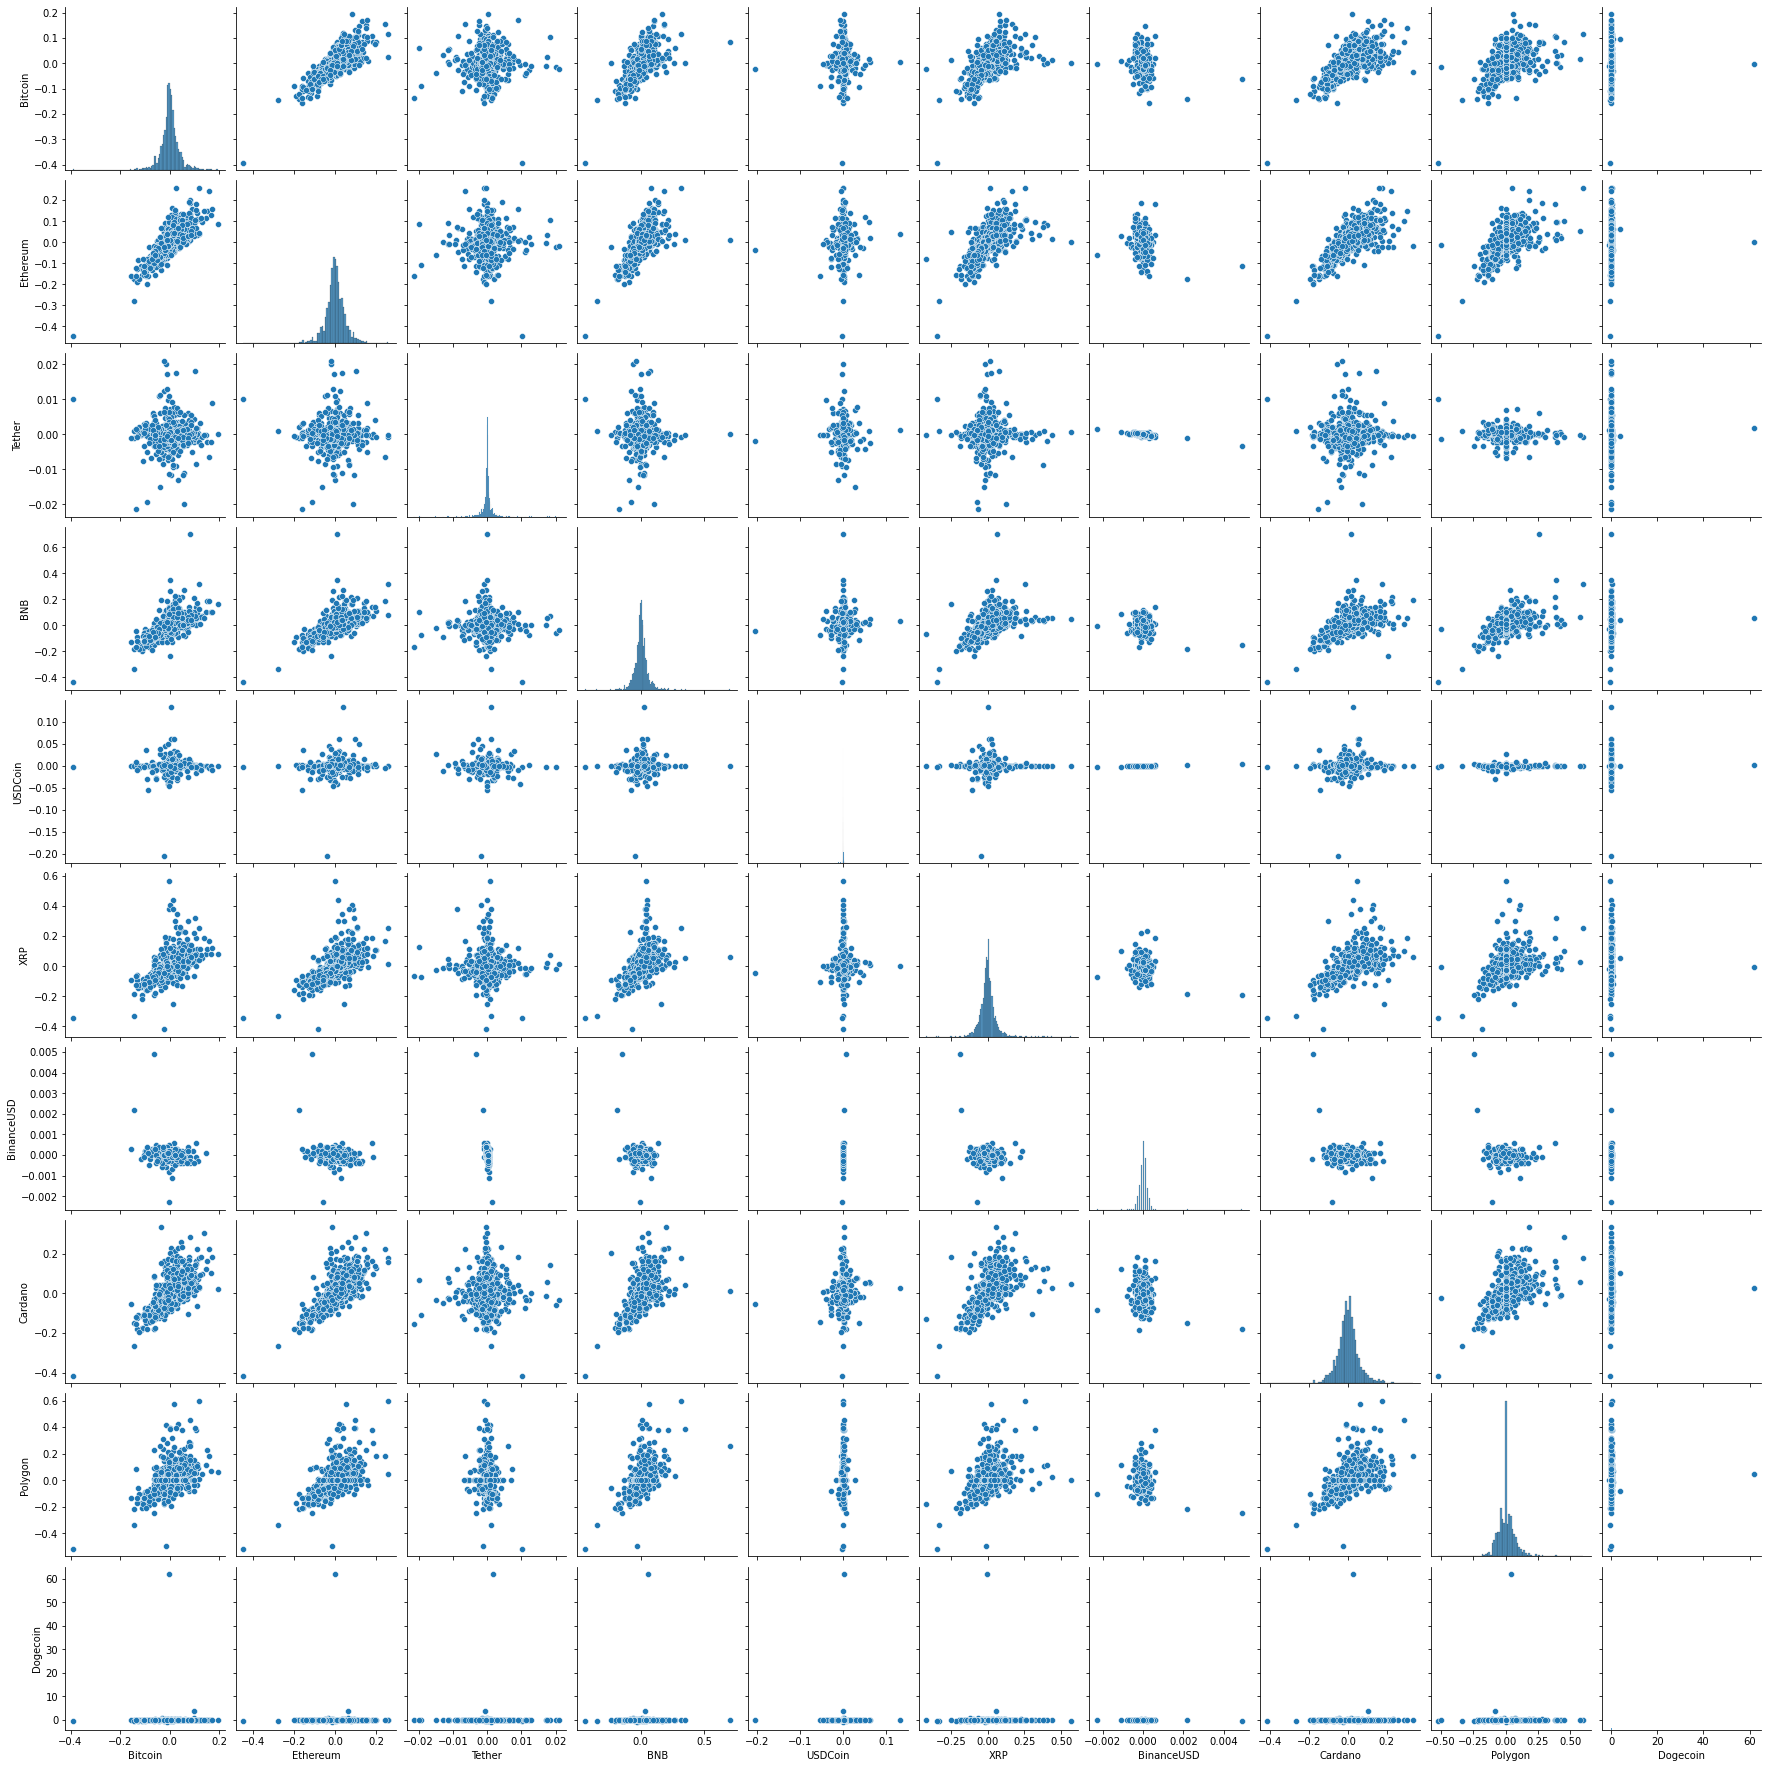

In [16]:
sns.pairplot(crypto)

In [17]:
crypto_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     726.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:38:10   Log-Likelihood:                 4515.1
No. Observations:                1827   AIC:                            -9016.
Df Residuals:                    1820   BIC:                            -8978.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.531e-05      0.000     -0.032      0.975      -0.001       0.001
Ethereum       0.4572      0.017     26.331      0.000       0.423       0.491
Tether        -0.1430      0.215     -0.666      0.506      -0.564       0.278
BNB            0.1003      0.012      8.068      0.000       0.076       0.125
XRP            0.0370      0.012      3.192      0.001       0.014       0.060
Cardano        0.0746      0.013      5.546      0.000       0.048       0.101
Dogecoin   -2.681e-05      0.000     -0.081      0.935      -0.001       0.001
==============================================================================
Omnibus:                      239.520   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.457
Skew:                           0.466   Prob(JB):                    4.70e-300
Kurtosis:                       7.152   Cond. No.                         652.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
crypto_first_lm = smf.ols(formula='Bitcoin~Ethereum+Tether+BNB+USDCoin+XRP+BinanceUSD+Cardano+Dogecoin', data=crypto).fit()

In [19]:
crypto_first_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          5.02e-175
Time:                        22:38:10   Log-Likelihood:                 1458.1
No. Observations:                 522   AIC:                            -2898.
Df Residuals:                     513   BIC:                            -2860.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.001     -0.346      0.730      -0.002       0.001
Ethereum       0.4493      0.031     14.544      0.000       0.389       0.510
Tether         3.6745      4.170      0.881      0.379      -4.517      11.866
BNB            0.1059      0.033      3.237      0.001       0.042       0.170
USDCoin        6.3767      4.686      1.361      0.174      -2.830      15.584
XRP            0.0697      0.026      2.695      0.007       0.019       0.120
BinanceUSD    -2.4644      5.199     -0.474      0.636     -12.678       7.749
Cardano        0.0871      0.025      3.531      0.000       0.039       0.136
Dogecoin       0.0319      0.018      1.818      0.070      -0.003       0.066
==============================================================================
Omnibus:                       93.913   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.092
Skew:                           0.801   Prob(JB):                     1.55e-71
Kurtosis:                       6.525   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
anova_lm(crypto_first_lm, crypto_lm)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,513.0,0.114525,0.0,NaN,NaN,NaN
1,1820.0,0.763316,-1307.0,-0.648792,1.183577,NaN


It means that we can't reject the null, so that we had better use the removed(first) model.

In [21]:
crypto_second_lm = smf.ols(formula='Bitcoin~Ethereum+Tether+BNB+USDCoin+XRP+Cardano+Dogecoin', data=crypto).fit()

In [22]:
crypto_second_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     516.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:38:10   Log-Likelihood:                 3781.1
No. Observations:                1535   AIC:                            -7546.
Df Residuals:                    1527   BIC:                            -7503.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.001     -0.320      0.749      -0.001       0.001
Ethereum       0.4662      0.019     25.007      0.000       0.430       0.503
Tether        -0.6000      0.307     -1.954      0.051      -1.202       0.002
BNB            0.1008      0.014      7.290      0.000       0.074       0.128
USDCoin       -0.1577      0.062     -2.559      0.011      -0.279      -0.037
XRP            0.0460      0.012      3.699      0.000       0.022       0.070
Cardano        0.0646      0.015      4.369      0.000       0.036       0.094
Dogecoin   -1.958e-05      0.000     -0.059      0.953      -0.001       0.001
==============================================================================
Omnibus:                      206.107   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1286.932
Skew:                           0.447   Prob(JB):                    3.52e-280
Kurtosis:                       7.396   Cond. No.                         923.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
anova_lm(crypto_second_lm, crypto_first_lm)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1527.0,0.651764,0.0,NaN,NaN,NaN
1,513.0,0.114525,1014.0,0.537239,2.373271,1.059796e-26


It means that we can reject the null, so that we had better use the full(first) model.

In [24]:
crypto_price = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Final Project/First_price.csv")

In [25]:
crypto_price.head()

,Bitcoin,Ethereum,BNB,XRP,Cardano
0,23852.5,1662.71,310.00,0.39,0.39
1,23539.6,1640.66,304.41,0.38,0.39
2,24327.9,1675.43,317.50,0.40,0.42
3,22198.5,1555.46,296.20,0.38,0.39
4,21772.6,1505.84,294.31,0.37,0.36


In [26]:
crypto_lm.params

Intercept   -0.000015
Ethereum     0.457181
Tether      -0.143028
BNB          0.100251
XRP          0.036994
Cardano      0.074616
Dogecoin    -0.000027
dtype: float64

In [27]:
crypto_price['Item'] = crypto_lm.params.Ethereum * crypto_price['Ethereum'] + crypto_lm.params.BNB * crypto_price['BNB'] 
+ crypto_lm.params.XRP * crypto_price['XRP'] + crypto_lm.params.Cardano * crypto_price['Cardano']

In [28]:
crypto_price.head()

,Bitcoin,Ethereum,BNB,XRP,Cardano,Item
0,23852.5,1662.71,310.00,0.39,0.39,791.280313
1,23539.6,1640.66,304.41,0.38,0.39,780.638705
2,24327.9,1675.43,317.50,0.40,0.42,797.850144
3,22198.5,1555.46,296.20,0.38,0.39,740.863848
4,21772.6,1505.84,294.31,0.37,0.36,717.986459


In [29]:
crypto_price.tail()

,Bitcoin,Ethereum,BNB,XRP,Cardano,Item
1822,10473.0,839.10,9.37,0.95,0.33,384.619429
1823,11238.7,884.51,9.89,1.03,0.35,405.436587
1824,11169.4,940.08,11.06,1.11,0.38,430.964609
1825,10398.8,913.10,10.64,1.07,0.37,418.585543
1826,11073.5,971.54,11.66,1.18,0.42,445.413238


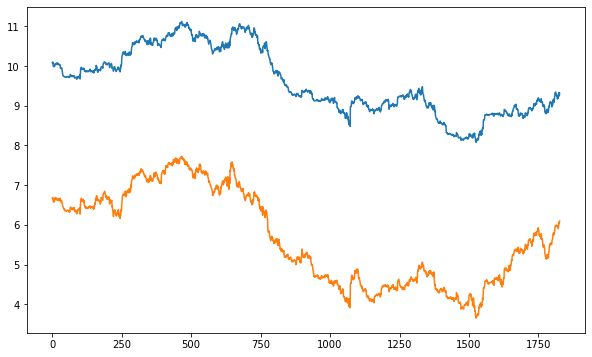

In [31]:
plt.figure(figsize=(10,6))
plt.plot(np.log(crypto_price['Bitcoin']))
plt.plot(np.log(crypto_price['Item']))
plt.show()